<a href="https://colab.research.google.com/github/neeeal/car-bike-classifer-app/blob/main/DevOps_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
!pip install opendatasets


In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 42.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Succ

In [ ]:
## Importing Libraries

import opendatasets as od
import os
import zipfile
import random
import shutil
# import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import requests
import IPython
import urllib
import tensorflowjs as tfjs

from numpy import mean
from numpy import std
from PIL import Image
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Dropout, ReLU, Softmax, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential

## Downloading Dataset
<br>
The dataset to be used in this activity is car vs bike classification dataset from kaggle. This dataset is a collection of 2000 images of cars and bikes, andthe goal of this activity is to show different image augmentation techniques and creating a harness baseline model and a better, more complex CNN-Classifier model.

In [ ]:
# {"username":"nealbjm","key":"14f4df63eacde4d36d04866beaa85538"}
# od.download('https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset')
# od.download('https://www.kaggle.com/datasets/mostafaabla/garbage-classification')
# od.download('https://www.kaggle.com/datasets/alessiocorrado99/animals10')
od.download('https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nealbjm
Your Kaggle Key: ··········


100%|██████████| 103M/103M [00:00<00:00, 112MB/s]  


## Creating Directories and Moving Images

In [ ]:
## Creating Train and Test Directories

src_dir = '/content/car-vs-bike-classification-dataset/Car-Bike-Dataset'
main_dir = '/content/data'
train_dir = os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
classes = os.listdir(src_dir)

if os.path.isdir(main_dir) == False: os.mkdir(main_dir)
if os.path.isdir(train_dir) == False: os.mkdir(train_dir)
if os.path.isdir(test_dir) == False: os.mkdir(test_dir)

for c in classes:
    c_train_dir = os.path.join(train_dir,c)
    c_test_dir = os.path.join(test_dir,c)

    if os.path.isdir(c_train_dir) == False: os.mkdir(c_train_dir)
    if os.path.isdir(c_test_dir) == False: os.mkdir(c_test_dir)

In [ ]:
classes

['Car', 'Bike']

In [ ]:
## Copying files from source directory to train and test directories

for c in classes:
    c_src_dir = os.path.join(src_dir,c)
    image_filenames = os.listdir(c_src_dir)
    random.shuffle(image_filenames)
    num_files = len(image_filenames)
    for n,image_file in enumerate(image_filenames):
        # if n >= round(num_files*0.50): break
        img_file_src = os.path.join(c_src_dir,image_file)
        if os.path.getsize(img_file_src) <= 0:
            print(f'{image_file} is zero length, so ignoring')
            continue
        if n%10<2:  dest_dir = os.path.join(main_dir,'test')
        else: dest_dir = os.path.join(main_dir,'train')
        c_dest_dir = os.path.join(dest_dir,c)
        img_file_dest = os.path.join(c_dest_dir,image_file)
        copyfile(img_file_src,img_file_dest)

In [ ]:
train_dir = '/content/data/train'
test_dir = '/content/data/test'

shape  (100, 100, 3)


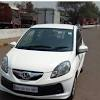

In [ ]:
## Checking image shapes
img1_path = os.path.join(train_dir,classes[0])
path = os.path.join(img1_path,os.listdir(img1_path)[0])
image = cv2.imread(path)

print('shape ',image.shape)
cv2_imshow(image)

shape  (168, 300, 3)


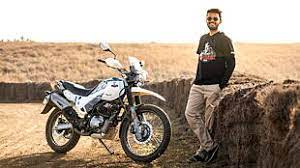

In [ ]:
## Checking image shapes
img2_path = os.path.join(train_dir,classes[-1])
path = os.path.join(img2_path,os.listdir(img2_path)[0])
image = cv2.imread(path)

print('shape ',image.shape)
cv2_imshow(image)

## Getting x_train to fit generators

In [ ]:
img_size = (75,75)

In [ ]:
def get_data(group_dir):
    data = []
    classes = os.listdir(group_dir)
    for n,c in enumerate(classes):
        c_path = os.path.join(group_dir,c)
        files = os.listdir(c_path)
        for m,f in enumerate(files):
            try:
                file_main = os.path.join(c_path,f)
                old_image= cv2.imread(file_main)
                new_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2GRAY)
                new_image= cv2.resize(new_image,img_size)
                data.extend([new_image])
            except:
                pass
            if m >= 25: break
        break
    return np.array(data)

In [ ]:
x_train = get_data(train_dir)
x_train = x_train.reshape(x_train.shape[0],img_size[0],img_size[1],1)

In [ ]:
x_train.shape

(26, 75, 75, 1)

## Creating sample image generators

In [ ]:
sample_dir = '/content/augment_samples_feature_center'

In [ ]:
# ## Sample Generator feature center
# if os.path.isdir(sample_dir)==False:
#     os.mkdir(sample_dir)
# sample_data_gen = ImageDataGenerator(#rescale=1./255,
#                                      featurewise_center = True,
#                                     #  featurewise_std_normalization = True,
#                                     #  zca_whitening = True,
#                                      rotation_range = 45,
#                                      width_shift_range = 0.2,
#                                      height_shift_range = 0.2,
#                                      horizontal_flip = True,
#                                     #  zoom_range = 0.4
#                                      )

# sample_data_gen.fit(x_train)

# sample_generator = sample_data_gen.flow_from_directory(train_dir,
#                                                      target_size = img_size,
#                                                     #  color_mode='grayscale',
#                                                      batch_size = 9,
#                                                      save_to_dir = sample_dir,
#                                                      color_mode='grayscale'
#                                                      )
# samples = sample_generator.next()

# ## Saving sample images
# for sample in samples:
#   print(sample.min(), sample.mean(), sample.max())
#   fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
#   for i in range(3):
#       for j in range(3):
#           ax[i][j].imshow(sample[i*3+j], cmap=plt.get_cmap());
#   break
# # show the plot
# plt.show()

In [ ]:
# ## Sample Generator feature normalization
# sample_dir = '/content/augment_samples_feature_std'
# if os.path.isdir(sample_dir)==False:
#     os.mkdir(sample_dir)
# sample_data_gen = ImageDataGenerator(#rescale=1./255,
#                                     #  featurewise_center = True,
#                                      featurewise_std_normalization = True,
#                                     #  zca_whitening = True,
#                                      rotation_range = 45,
#                                      width_shift_range = 0.2,
#                                      height_shift_range = 0.2,
#                                      horizontal_flip = True,
#                                     #  zoom_range = 0.4
#                                      )

# sample_data_gen.fit(x_train)

# sample_generator = sample_data_gen.flow_from_directory(train_dir,
#                                                      target_size = img_size,
#                                                     #  color_mode='grayscale',
#                                                      batch_size = 9,
#                                                      save_to_dir = sample_dir,
#                                                      color_mode='grayscale'
#                                                      )
# samples = sample_generator.next()

# ## Saving sample images
# for sample in samples:
#   print(sample.min(), sample.mean(), sample.max())
#   fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
#   for i in range(3):
#       for j in range(3):
#           ax[i][j].imshow(sample[i*3+j], cmap=plt.get_cmap());
#   break
# # show the plot
# plt.show()

In [ ]:
# ## Sample Generator zca whitening
# sample_dir = '/content/augment_samples_zca'
# if os.path.isdir(sample_dir)==False:
#     os.mkdir(sample_dir)
# sample_data_gen = ImageDataGenerator(#rescale=1./255,
#                                     #  featurewise_center = True,
#                                     #  featurewise_std_normalization = True,
#                                      zca_whitening = True,
#                                      rotation_range = 45,
#                                      width_shift_range = 0.2,
#                                      height_shift_range = 0.2,
#                                      horizontal_flip = True,
#                                     #  zoom_range = 0.4
#                                      )

# sample_data_gen.fit(x_train)

# sample_generator = sample_data_gen.flow_from_directory(train_dir,
#                                                      target_size = img_size,
#                                                     #  color_mode='grayscale',
#                                                      batch_size = 9,
#                                                      save_to_dir = sample_dir,
#                                                      color_mode='grayscale'
#                                                      )
# samples = sample_generator.next()

# ## Saving sample images
# for sample in samples:
#   print(sample.min(), sample.mean(), sample.max())
#   fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
#   for i in range(3):
#       for j in range(3):
#           ax[i][j].imshow(sample[i*3+j], cmap=plt.get_cmap());
#   break
# # show the plot
# plt.show()

In [ ]:
# ## Sample Generator feature center, feature std normalization, and zca whitening
# sample_dir = '/content/augment_samples_all'
# if os.path.isdir(sample_dir)==False:
#     os.mkdir(sample_dir)
# sample_data_gen = ImageDataGenerator(#rescale=1./255,
#                                      featurewise_center = True,
#                                      featurewise_std_normalization = True,
#                                      zca_whitening = True,
#                                      rotation_range = 45,
#                                      width_shift_range = 0.2,
#                                      height_shift_range = 0.2,
#                                      horizontal_flip = True,
#                                     #  zoom_range = 0.4
#                                      )

# sample_data_gen.fit(x_train)

# sample_generator = sample_data_gen.flow_from_directory(train_dir,
#                                                      target_size = img_size,
#                                                     #  color_mode='grayscale',
#                                                      batch_size = 9,
#                                                      save_to_dir = sample_dir,
#                                                      color_mode='grayscale'
#                                                      )
# samples = sample_generator.next()

# ## Saving sample images
# for sample in samples:
#   print(sample.min(), sample.mean(), sample.max())
#   fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
#   for i in range(3):
#       for j in range(3):
#           ax[i][j].imshow(sample[i*3+j], cmap=plt.get_cmap());
#   break
# # show the plot
# plt.show()

In [ ]:
# ## Sample Generator with simple augmentations
# sample_dir = '/content/augment_samples_basic'
# if os.path.isdir(sample_dir)==False:
#     os.mkdir(sample_dir)
# sample_data_gen = ImageDataGenerator(#rescale=1./255,
#                                     #  featurewise_center = True,
#                                     #  featurewise_std_normalization = True,
#                                     #  zca_whitening = True,
#                                      rotation_range = 45,
#                                      width_shift_range = 0.2,
#                                      height_shift_range = 0.2,
#                                      horizontal_flip = True,
#                                     #  zoom_range = 0.4
#                                      )

# sample_data_gen.fit(x_train)

# sample_generator = sample_data_gen.flow_from_directory(train_dir,
#                                                      target_size = img_size,
#                                                     #  color_mode='grayscale',
#                                                      batch_size = 9,
#                                                      save_to_dir = sample_dir,
#                                                      color_mode='grayscale'
#                                                      )
# samples = sample_generator.next()

# ## Saving sample images
# for sample in samples:
#   print(sample.min(), sample.mean(), sample.max())
#   fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
#   for i in range(3):
#       for j in range(3):
#           ax[i][j].imshow(sample[i*3+j], cmap=plt.get_cmap());
#   break
# # show the plot
# plt.show()

In [ ]:
## Train and Test Generators
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    #  featurewise_center = True,
                                    #  featurewise_std_normalization = True,
                                    #  zca_whitening = True,
                                     rotation_range = 45,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     horizontal_flip = True,
                                    #  zoom_range = 0.4
                                     )

train_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = img_size,
                                                    #  color_mode='grayscale',
                                                     batch_size = 64,
                                                    #  save_to_dir = sample_dir,
                                                     color_mode='grayscale'
                                                     )

test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(test_dir,
                                                     target_size = img_size,
                                                    #  color_mode='grayscale',
                                                     batch_size = 64,
                                                    #  save_to_dir = sample_dir,
                                                     color_mode='grayscale'
                                                     )

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


# Training Models

In [ ]:
units = len(classes)

## Creating Test Harness Baseline Model

In [ ]:
def baseline_model():
    '''
    Function for creating baseline sequential model
    '''
    model = Sequential()


    model.add(Input(shape=img_size+(1,)))

    model.add(Conv2D(filters=32,
                     kernel_size = (3,3),
                     strides=(1, 1),
                     kernel_initializer='glorot_normal',
                     ))
    model.add(ReLU())
    model.add(MaxPooling2D())
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(units=units,
                    kernel_initializer='glorot_normal',))
    model.add(Softmax())


    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['acc'])

    model.summary()

    return model

def evaluate_model(train_gen, test_gen, model):
    the_model = model
    history = the_model.fit(train_gen, validation_data=test_gen,
                        epochs = 32)
    scores = history.history['val_acc']
    return scores, history

def summarize_diagnostics(histories):
    # plot loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories.history['loss'], color='blue', label='train')
    plt.plot(histories.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories.history['acc'], color='blue', label='train')
    plt.plot(histories.history['val_acc'], color='orange', label='test')
    plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

def run_test_harness():
    # create model
    model = baseline_model()
    # evaluate model
    scores, histories = evaluate_model(train_generator, test_generator, model)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

In [ ]:
run_test_harness()

In [ ]:

model3 = baseline_model()
history3 = model3.fit(train_generator, validation_data=test_generator,
                    epochs = 32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 73, 73, 32)        320       
                                                                 
 re_lu_2 (ReLU)              (None, 73, 73, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 36, 36, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 82946     
                                                      

In [ ]:
model3.save('/content/drive/MyDrive/Colab Notebooks/CPE 019/Final Requirement/my_model_v2.h5')

## Creating More Complex Model

In [ ]:
def baseline_model2():
    '''
    Function for creating baseline sequential model
    '''
    model = Sequential()


    model.add(Input(shape=img_size+(1,)))

    model.add(Conv2D(filters=64,
                     kernel_size = (3,3),
                     strides=(1, 1),
                     kernel_initializer='glorot_normal',
                     ))
    model.add(ReLU())
    model.add(Dropout(0.4))

    model.add(Conv2D(filters=128,
                     kernel_size = (5,5),
                     strides=(2, 2),
                     kernel_initializer='glorot_normal',
                     ))
    model.add(ReLU())
    model.add(MaxPooling2D())
    model.add(Dropout(0.4))

    model.add(Conv2D(filters=256,
                     kernel_size = (3,3),
                     strides=(1, 1),
                     kernel_initializer='glorot_normal',
                     ))
    model.add(ReLU())
    model.add(Dropout(0.4))
    model.add(Conv2D(filters=512,
                     kernel_size = (5,5),
                     strides=(2, 2),
                     kernel_initializer='glorot_normal',
                     ))
    model.add(ReLU())
    model.add(MaxPooling2D())
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(units=128,
                    kernel_initializer='glorot_normal',))
    model.add(ReLU())
    model.add(Dropout(0.4))
    model.add(Dense(units=units,
                    kernel_initializer='glorot_normal',))
    model.add(Softmax())


    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['acc'])
    return model

baseline_model2().summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 73, 73, 64)        640       
                                                                 
 re_lu_18 (ReLU)             (None, 73, 73, 64)        0         
                                                                 
 dropout_18 (Dropout)        (None, 73, 73, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 35, 35, 128)       204928    
                                                                 
 re_lu_19 (ReLU)             (None, 35, 35, 128)       0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 17, 17, 128)       0         
 g2D)                                                            
                                                      

In [ ]:
model2 = baseline_model2()
history2 = model2.fit(train_generator, validation_data=test_generator,
                    epochs = 16)

Epoch 1/16


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 [==============================] - 15s 250ms/step - loss: 0.7203 - acc: 0.5041 - val_loss: 0.6906 - val_acc: 0.5013
Epoch 2/16
50/50 [==============================] - 12s 243ms/step - loss: 0.6914 - acc: 0.5281 - val_loss: 0.6786 - val_acc: 0.6825
Epoch 3/16
50/50 [==============================] - 12s 236ms/step - loss: 0.6047 - acc: 0.6703 - val_loss: 0.4749 - val_acc: 0.7588
Epoch 4/16
50/50 [==============================] - 12s 244ms/step - loss: 0.5391 - acc: 0.7331 - val_loss: 0.4248 - val_acc: 0.8075
Epoch 5/16
50/50 [==============================] - 13s 252ms/step - loss: 0.4688 - acc: 0.7884 - val_loss: 0.4168 - val_acc: 0.8087
Epoch 6/16
50/50 [==============================] - 12s 235ms/step - loss: 0.4656 - acc: 0.7891 - val_loss: 0.3325 - val_acc: 0.8850
Epoch 7/16
50/50 [==============================] - 12s 237ms/step - loss: 0.4413 - acc: 0.8069 - val_loss: 0.4503 - val_acc: 0.8100
Epoch 8/16
50/50 [==============================] - 13s 251ms/step - loss: 0.369

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Results and Conclusion

## Evaluating Model

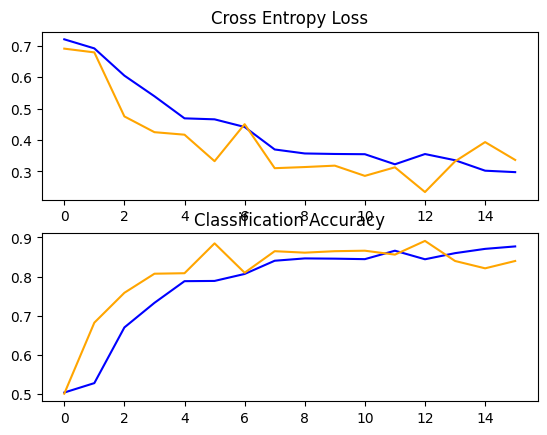

In [ ]:
summarize_diagnostics(history2)

Accuracy: mean=81.000 std=9.432, n=16


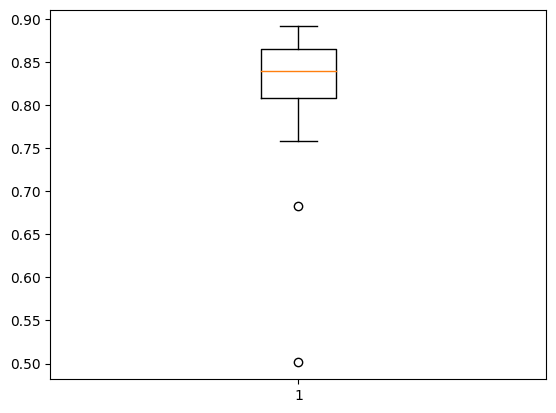

In [ ]:
summarize_performance(history2.history['val_acc'])

In [ ]:
model2.evaluate(test_generator)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 [==============================] - 1s 97ms/step - loss: 0.3364 - acc: 0.8400


[0.33643192052841187, 0.8399999737739563]

In [ ]:
### Testing on random real world
req = urllib.request.urlopen('https://1.bp.blogspot.com/-lxb3D0TWsFs/UAfzV_25pOI/AAAAAAAAFtQ/S6wXUYpFVxs/s1600/Sports+Motorcycles+Wallpapers+2.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
cv2.imwrite('image.jpg', img)

old_image= cv2.imread('/content/image.jpg')
new_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2GRAY)
new_image= cv2.resize(new_image,img_size)
new_image = new_image.reshape(1, img_size[0], img_size[1], 1)
#my_show(plt.gca(), cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
# Generating and printing prediction

result = model2.predict(new_image)
value = 'Bike'

1/1 [==============================] - 0s 81ms/step


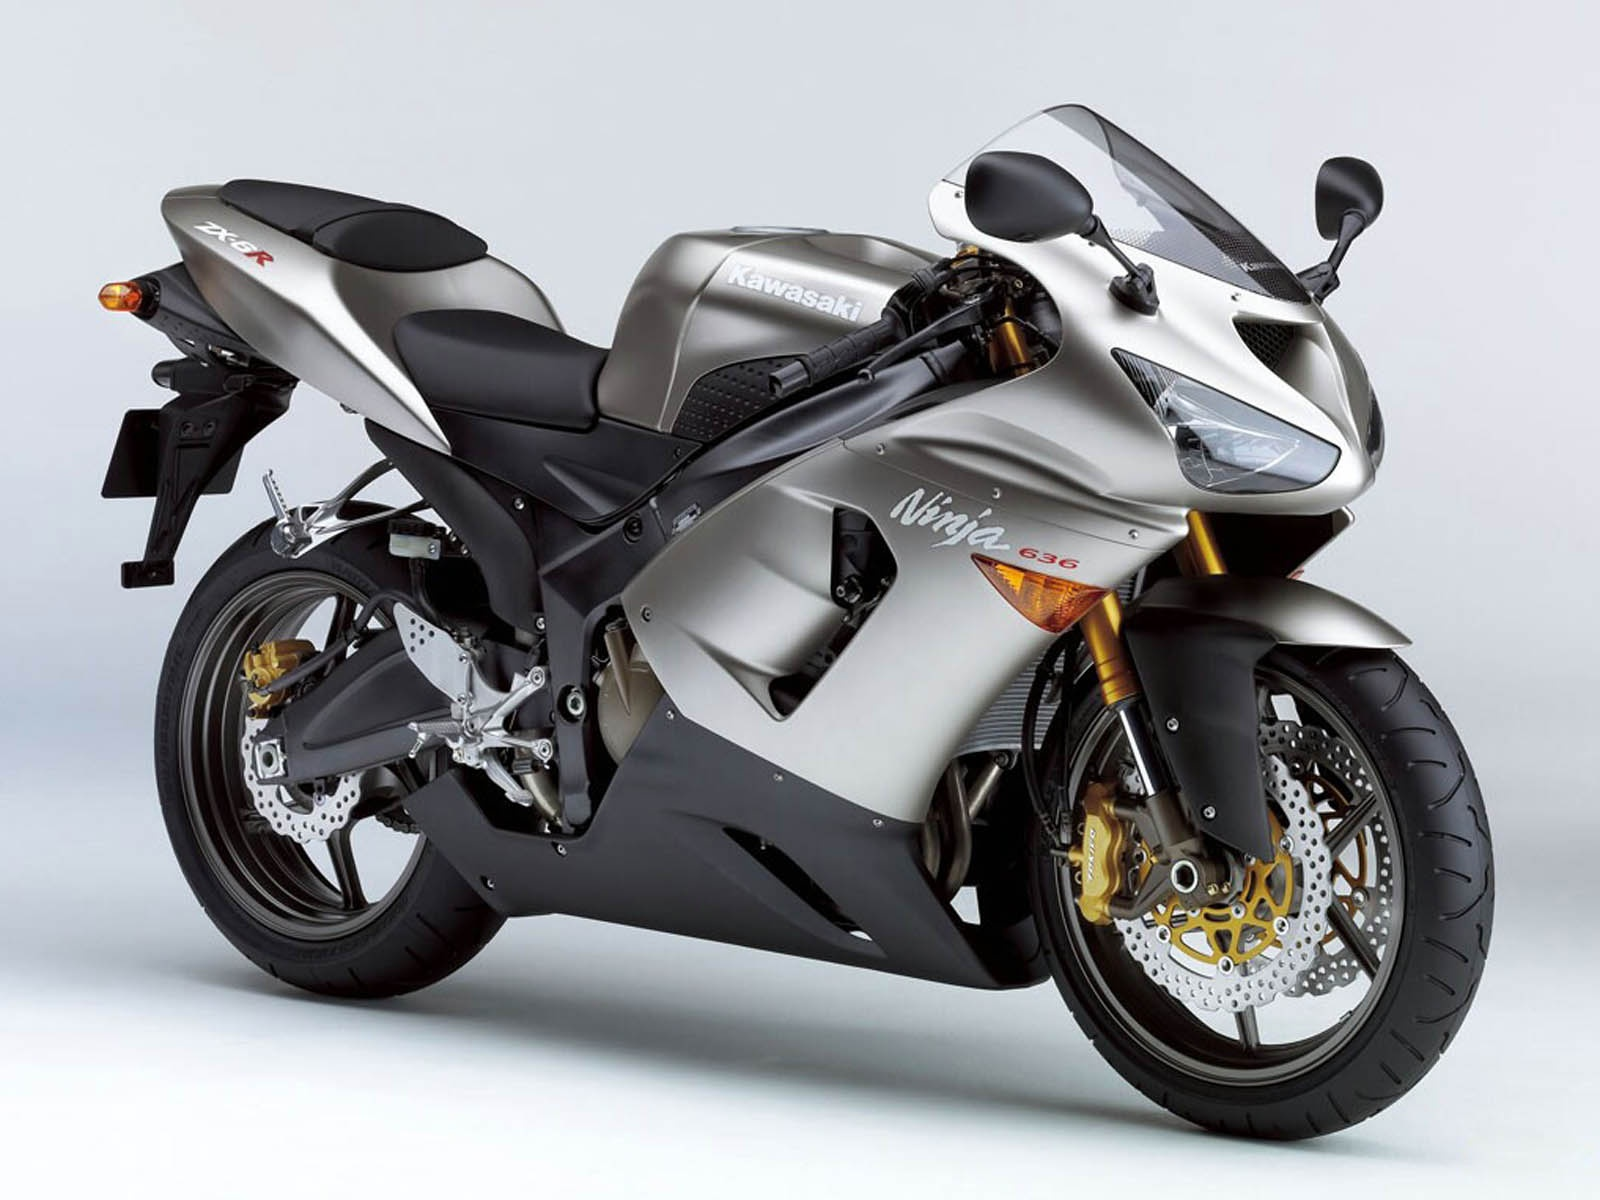

In [ ]:
cv2_imshow(old_image)

In [ ]:
print('True Value:', value )
print('Predicted:',classes[np.argmax(result)])

True Value: Bike
Predicted: Car


In [ ]:
classes

['Car', 'Bike']

In [ ]:
tfjs_target_dir = "tfjs_carbike"

tfjs.converters.save_keras_model(model2, tfjs_target_dir)

In [ ]:
tfjs_target_dir = "tfjs_carbike_v2"

tfjs.converters.save_keras_model(model2, tfjs_target_dir)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!zip -r /content/tfjs_carbike_v1.zip /content/tfjs_carbike_v2

  adding: content/tfjs_carbike_v2/ (stored 0%)
  adding: content/tfjs_carbike_v2/group1-shard3of5.bin (deflated 7%)
  adding: content/tfjs_carbike_v2/group1-shard4of5.bin (deflated 7%)
  adding: content/tfjs_carbike_v2/group1-shard2of5.bin (deflated 7%)
  adding: content/tfjs_carbike_v2/model.json (deflated 85%)
  adding: content/tfjs_carbike_v2/group1-shard5of5.bin (deflated 7%)
  adding: content/tfjs_carbike_v2/group1-shard1of5.bin (deflated 7%)


## Conclusion
<br>
In this activity, I used the cars vs bike classification dataset in order to show different augmentation techniques and create a complex CNN Model in comparison to a harness baseline bodel. There were three (5) sample image data generators created: featurewise_center, featurewise_std_normalization, zca_whitening, one with all three, and one with none, only using basic augmentations. Featurewise_center and featurewise_std_normalization had almost no noticable changes, however zca_whitening showed very distinct differences -- it decorrelates and normalizes the data visbily. Each batch of samples were saved in the temporary storage of google colab which can be then run and retrieved per running instance in order to save space.
<br><br>
Afterwards, a test harness baseline model was created in order to become the basis of the more complex CNN-Classification model. The test model showed a final result of loss: 0.4400 - acc: 0.8066 - val_loss: 0.5757 - val_acc: 0.7487. Meanwhile, the more complex CNN-Classification model showed a result of loss: 0.2818 - acc: 0.8844 - val_loss: 0.3728 - val_acc: 0.8375. Given this final results, we can clearly see that the complex model greatly improved in accuracy and loss in comparison to the harness baseline model.
<br><br>
Lastly, the complex CNN-Classification model was then tested on a real world image of a bike from the internet. The image underwent transformation such as grayscaling, resizing, and reshaping in order to be fed to the model, of which then the model predicted "Bike" which shows that our model can competently predict real world images not found from our dataset.